In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Đọc ảnh xám
image_path = 'D:\\Github\\TH1381-Computer-Vision\\OnThi\\TailieuOnthi\\image\\Bear.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = image.astype(np.float32)

In [4]:
# Chuyển đổi từ miền không gian sang miền tần số sử dụng OpenCV
dft = cv2.dft(image, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)  # Dịch chuyển DFT để đưa tần số thấp vào trung tâm

In [5]:
# Hiển thị phổ biên độ (magnitude spectrum)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

In [6]:
# Chuyển đổi ngược từ miền tần số về miền không gian sử dụng OpenCV
idft_shift = np.fft.ifftshift(dft_shift)  # Dịch chuyển ngược DFT
image_back = cv2.idft(idft_shift, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)

In [7]:
# Chuyển đổi từ miền không gian sang miền tần số sử dụng NumPy
fft = np.fft.fft2(image)
fft_shift = np.fft.fftshift(fft)  # Dịch chuyển FFT để đưa tần số thấp vào trung tâm

In [8]:
# Hiển thị phổ biên độ (magnitude spectrum)
magnitude_spectrum_np = 20 * np.log(np.abs(fft_shift))

In [9]:
# Chuyển đổi ngược từ miền tần số về miền không gian sử dụng NumPy
ifft_shift = np.fft.ifftshift(fft_shift)  # Dịch chuyển ngược FFT
image_back_np = np.fft.ifft2(ifft_shift)
image_back_np = np.abs(image_back_np)

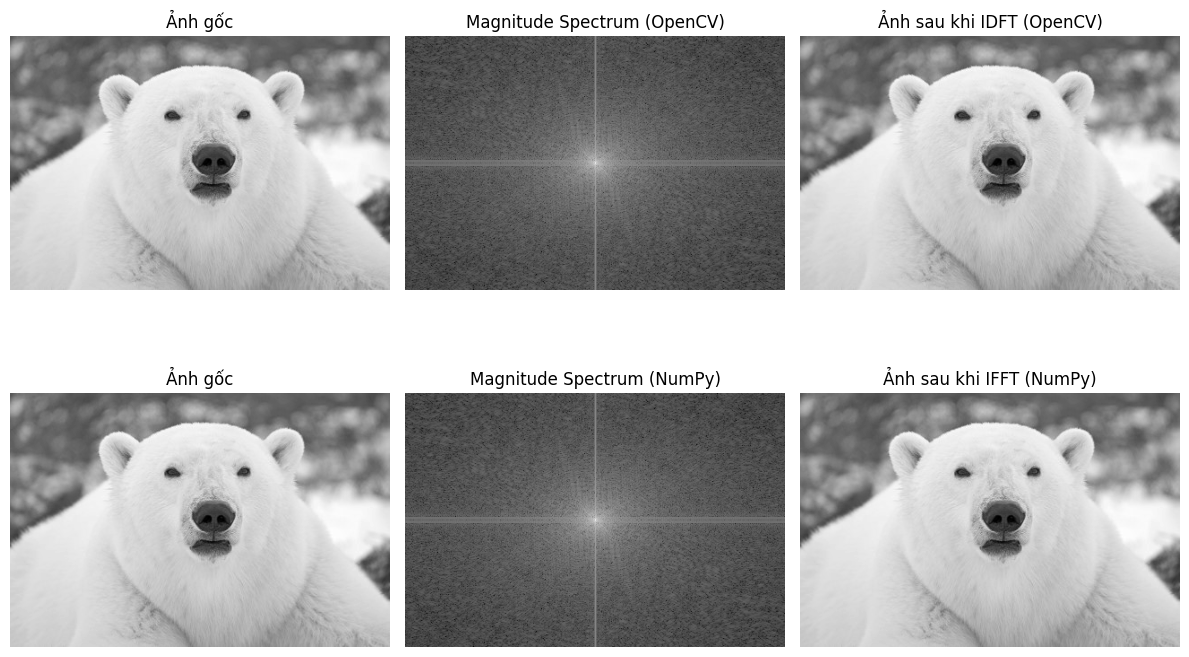

In [11]:
# Hiển thị kết quả
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Ảnh gốc')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum (OpenCV)')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(image_back, cmap='gray')
plt.title('Ảnh sau khi IDFT (OpenCV)')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(image, cmap='gray')
plt.title('Ảnh gốc')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(magnitude_spectrum_np, cmap='gray')
plt.title('Magnitude Spectrum (NumPy)')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(image_back_np, cmap='gray')
plt.title('Ảnh sau khi IFFT (NumPy)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Tạo ảnh lai (Hybrid image)

In [17]:
# Bước 1: Lấy thành phần tần số thấp của ảnh Dog
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_url_dog = 'D:\\Github\\TH1381-Computer-Vision\\OnThi\\TailieuOnthi\\image\\dog.jpg'

img_url_bear = 'D:\\Github\\TH1381-Computer-Vision\\OnThi\\TailieuOnthi\\image\\Bear.jpg'

# Đọc ảnh Dog và chuyển sang ảnh xám
dog_image_path = img_url_dog
dog_image = cv2.imread(dog_image_path, cv2.IMREAD_GRAYSCALE)

# Đọc ảnh Bear và chuyển sang ảnh xám
bear_image_path = img_url_bear
bear_image = cv2.imread(bear_image_path, cv2.IMREAD_GRAYSCALE)

# Đảm bảo rằng cả hai ảnh có cùng kích thước
bear_image = cv2.resize(bear_image, (dog_image.shape[1], dog_image.shape[0]))

# Lấy thành phần tần số thấp của ảnh Dog sử dụng Gaussian Blur
low_freq_dog = cv2.GaussianBlur(dog_image, (31, 31), 0)

In [18]:
# Bước 2: Lấy thành phần tần số cao của ảnh Bear
# Lấy thành phần tần số cao của ảnh Bear
# 1. Lấy thành phần tần số thấp sử dụng Gaussian Blur
low_freq_bear = cv2.GaussianBlur(bear_image, (31, 31), 0)
# 2. Trừ thành phần tần số thấp khỏi ảnh gốc để có thành phần tần số cao
high_freq_bear = cv2.subtract(bear_image, low_freq_bear)

In [19]:
# Bước 3: Kết hợp 2 kết quả thu được để có ảnh lai
# Kết hợp thành phần tần số thấp của ảnh Dog và thành phần tần số cao của ảnh Bear
hybrid_image = cv2.add(low_freq_dog, high_freq_bear)

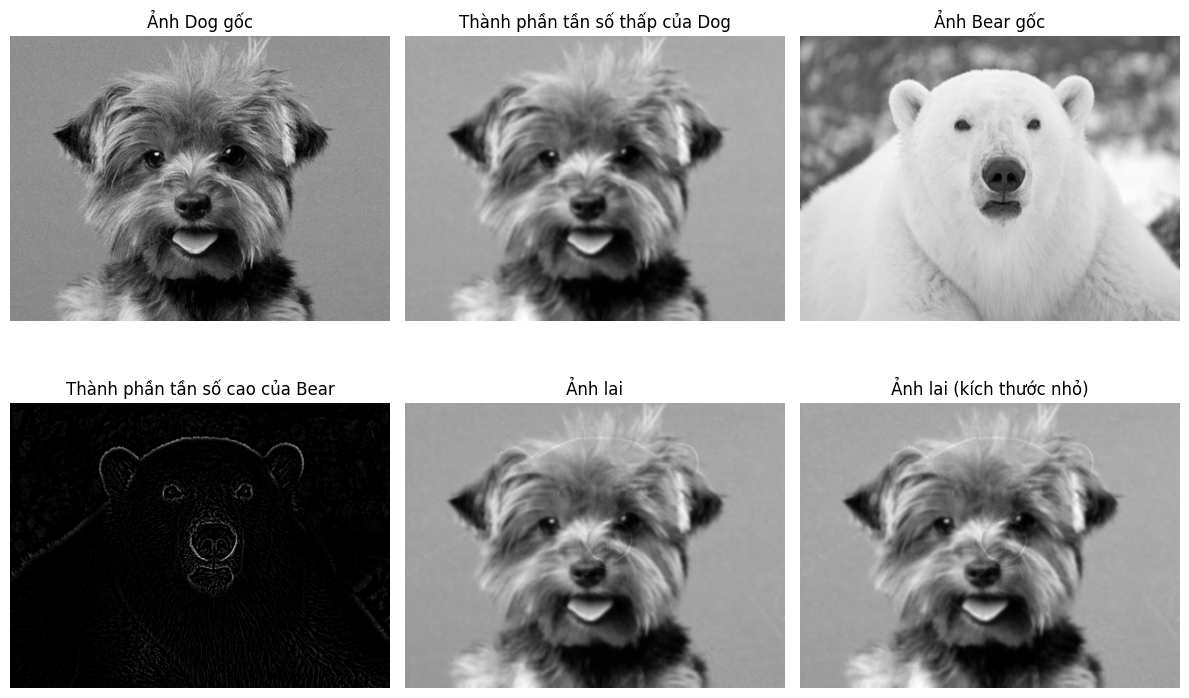

In [20]:
# Bước 4: Thay đổi kích thước ảnh kết quả để quan sát ảnh lai ở các tầm nhìn khác nhau và ghi nhận kết quả
# Thay đổi kích thước ảnh để quan sát ảnh lai ở các tầm nhìn khác nhau
hybrid_image_small = cv2.resize(hybrid_image, (0, 0), fx=0.5, fy=0.5)
hybrid_image_large = cv2.resize(hybrid_image, (0, 0), fx=1.5, fy=1.5)

# Hiển thị kết quả
plt.figure(figsize=(12, 8))

# Ảnh Dog gốc
plt.subplot(2, 3, 1)
plt.imshow(dog_image, cmap='gray')
plt.title('Ảnh Dog gốc')
plt.axis('off')

# Thành phần tần số thấp của ảnh Dog
plt.subplot(2, 3, 2)
plt.imshow(low_freq_dog, cmap='gray')
plt.title('Thành phần tần số thấp của Dog')
plt.axis('off')

# Ảnh Bear gốc
plt.subplot(2, 3, 3)
plt.imshow(bear_image, cmap='gray')
plt.title('Ảnh Bear gốc')
plt.axis('off')

# Thành phần tần số cao của ảnh Bear
plt.subplot(2, 3, 4)
plt.imshow(high_freq_bear, cmap='gray')
plt.title('Thành phần tần số cao của Bear')
plt.axis('off')

# Ảnh lai
plt.subplot(2, 3, 5)
plt.imshow(hybrid_image, cmap='gray')
plt.title('Ảnh lai')
plt.axis('off')

# Ảnh lai (kích thước nhỏ)
plt.subplot(2, 3, 6)
plt.imshow(hybrid_image_small, cmap='gray')
plt.title('Ảnh lai (kích thước nhỏ)')
plt.axis('off')

plt.tight_layout()
plt.show()